# Importing Data:-

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


<AxesSubplot:>

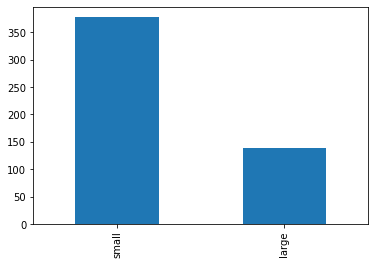

In [6]:
df.size_category.value_counts().plot.bar()

In [7]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
#As per question we have to accept these feature and target only.
df1=df[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain','size_category']]
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [9]:
df1.shape

(517, 11)

#  Analysing Data:-

In [10]:
df1.duplicated().sum()

19

In [11]:
df1.drop_duplicates(inplace=True)
df1.shape

(498, 11)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          498 non-null    object 
 1   day            498 non-null    object 
 2   FFMC           498 non-null    float64
 3   DMC            498 non-null    float64
 4   DC             498 non-null    float64
 5   ISI            498 non-null    float64
 6   temp           498 non-null    float64
 7   RH             498 non-null    int64  
 8   wind           498 non-null    float64
 9   rain           498 non-null    float64
 10  size_category  498 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 46.7+ KB


In [13]:
df1.describe(include= 'all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
count,498,498,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,174,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,NaN,NaN,90.633133,110.559036,547.917470,9.052610,18.985542,44.305221,3.982329,0.020884,NaN
std,NaN,NaN,5.593386,63.860758,249.041722,4.586864,5.764932,16.297634,1.774095,0.299506,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,NaN
25%,NaN,NaN,90.200000,68.875000,441.200000,6.500000,15.600000,33.000000,2.700000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.350000,8.400000,19.350000,41.500000,4.000000,0.000000,NaN
75%,NaN,NaN,92.900000,141.300000,713.675000,11.000000,22.875000,53.000000,4.900000,0.000000,NaN


In [14]:
# Allocating Feature :-
X = pd.get_dummies(df1.drop(columns="size_category"))

In [15]:
# Target Allocation:-
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y= LE.fit_transform(df1.size_category)
pd.DataFrame(Y).head()
# Consider Small As 1 and Large as 0.

,0
0,1
1,1
2,1
3,1
4,1


# Applying EDA:-

### Checking for Outlier:-

<AxesSubplot:ylabel='rain'>

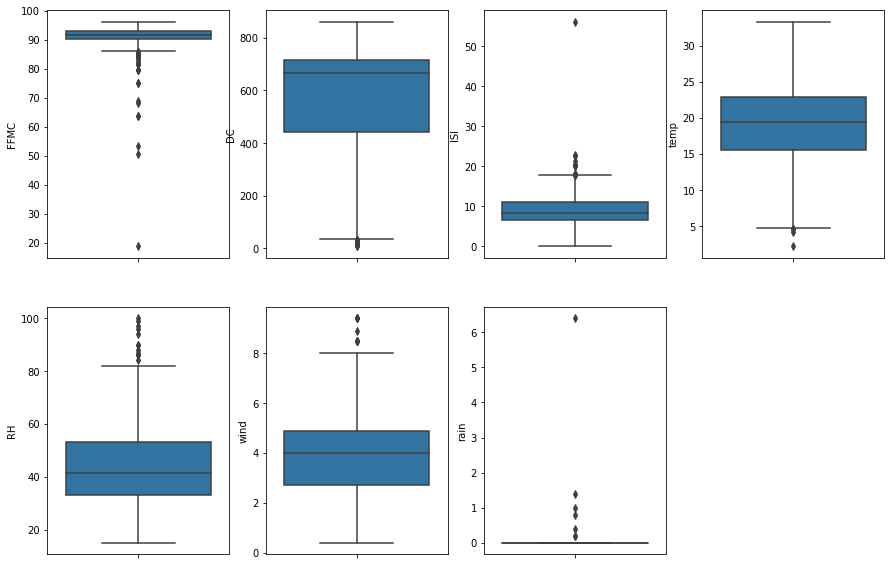

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='FFMC',data=df1)
plt.subplot(2,4,2)
sns.boxplot(y='DC',data=df1)
plt.subplot(2,4,3)
sns.boxplot(y='ISI',data=df1)
plt.subplot(2,4,4)
sns.boxplot(y='temp',data=df1)
plt.subplot(2,4,5)
sns.boxplot(y='RH',data=df1)
plt.subplot(2,4,6)
sns.boxplot(y='wind',data=df1)
plt.subplot(2,4,7)
sns.boxplot(y='rain',data=df1)
# almost all column has Outlier so we have to analyse the dataset for knowing the important feature.

<AxesSubplot:>

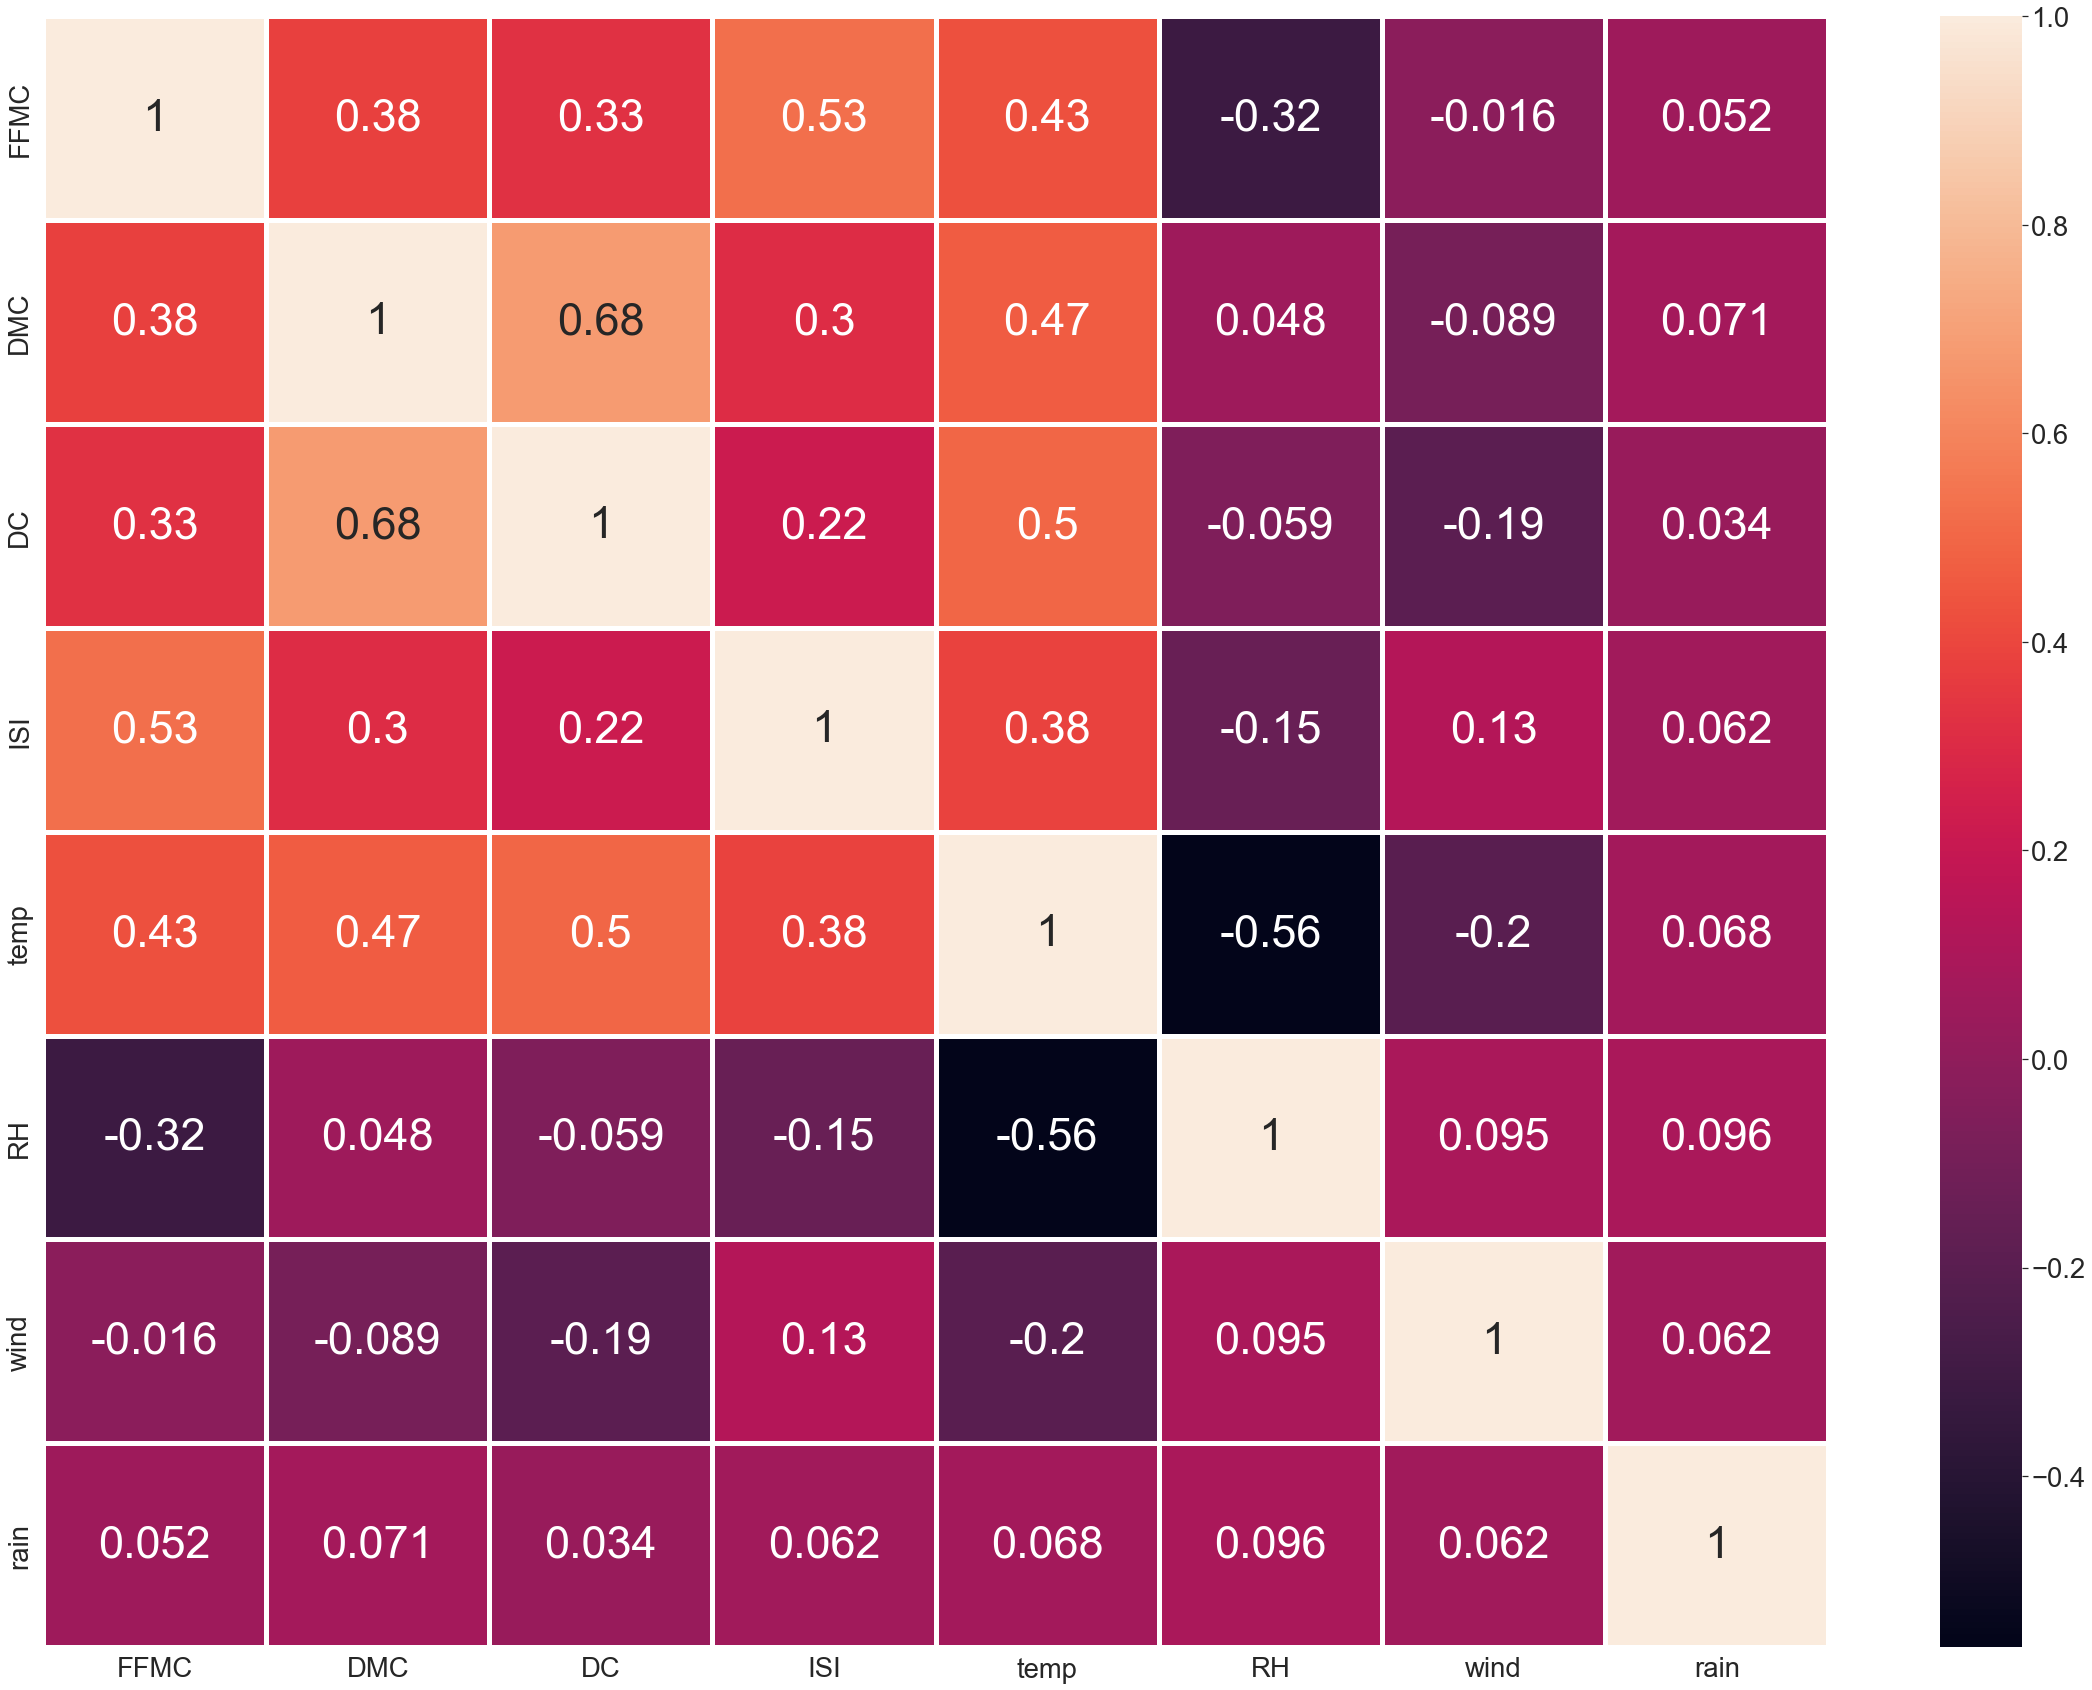

In [23]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,30))
sns.heatmap(df1.corr(),annot = True,linewidths=5,annot_kws={'size':45})

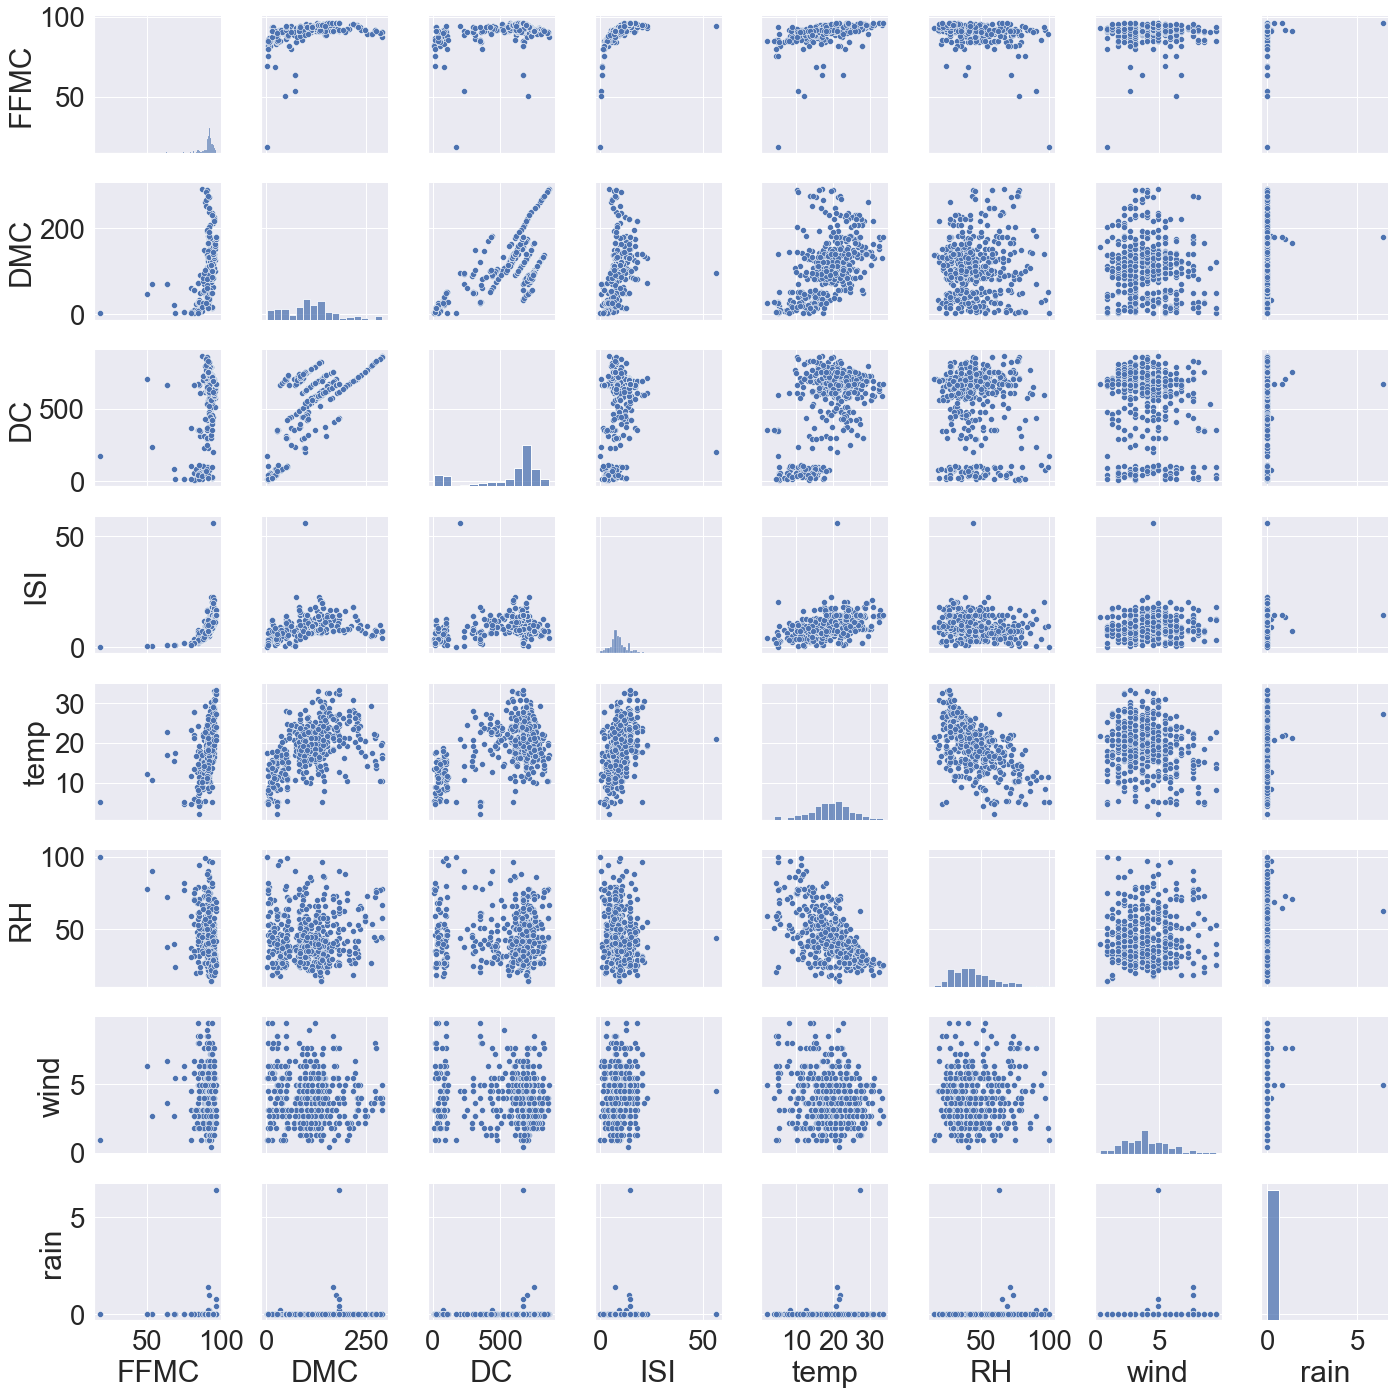

In [24]:
sns.set_style(style= "darkgrid")
sns.pairplot(df1) # Shows feature - feature realtionship  in which some has linear relationship which might have prblem of multicolinearity lets go in deep.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.loc[0:7]
# As Vif of DC is greater than  5  so it must be removed due to multicollinearity.

,VIF Factor,features
0,2.270339,FFMC
1,3.767562,DMC
2,26.137006,DC
3,1.797637,ISI
4,4.417455,temp
5,2.803413,RH
6,1.233577,wind
7,1.083464,rain


# Feature Scaling:-

In [27]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
x = SS.fit_transform(X)
x_scaled = pd.DataFrame(x)
# columns = pd.DataFrame(df.columns)
# frame = [columns , x_scaled]
# x_scaled = pd.concat(frame,axis=1)
# x_scaled


# PCA (Priciple Component Analysis):-
#### lets do PCA on feature as we see from VIF that some feature are irrelevant.

In [31]:
# performing PCA:-
from sklearn.decomposition import PCA

#Object Making:-
pca = PCA( n_components = 15)

pca_values = pca.fit_transform(x_scaled)

#The amount of variance that each PCA eaxplains is
var= np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [32]:
pca_values

array([[ 3.77378967, -1.4096169 , -0.83890847, ..., -0.53449344,
         0.31788214, -0.21061987],
       [ 0.41171314,  0.91652096, -1.30433936, ...,  1.64848078,
        -0.29314809, -2.63844018],
       [ 0.69997091,  1.22533358, -1.40810219, ...,  1.6013491 ,
        -0.62653449, -2.51483193],
       ...,
       [ 0.95567947, -0.26136142,  2.75825467, ..., -0.2070588 ,
        -0.39482317,  0.40931037],
       [-1.60780469, -0.94865864,  0.32442581, ...,  0.01757245,
        -0.38962328,  0.1243097 ],
       [ 4.07850851, -0.23844502, -0.58781658, ...,  3.26762423,
        -6.84860221, 10.68929158]])

In [33]:
# Making Blank DataFrame:-
pca= pd.DataFrame()

# Filling the dataframe with suitable value.
pca["Cummulative Variance"] = pd.DataFrame(var)
pca["Feature"] = pd.DataFrame(X.columns)

pca

,Cummulative Variance,Feature
0,13.94,FFMC
1,21.10,DMC
2,27.55,DC
3,33.06,ISI
4,37.93,temp
5,42.66,RH
6,47.18,wind
7,51.53,rain
8,55.77,month_apr
9,59.91,month_aug


<AxesSubplot:xlabel='Feature', ylabel='Cummulative Variance'>

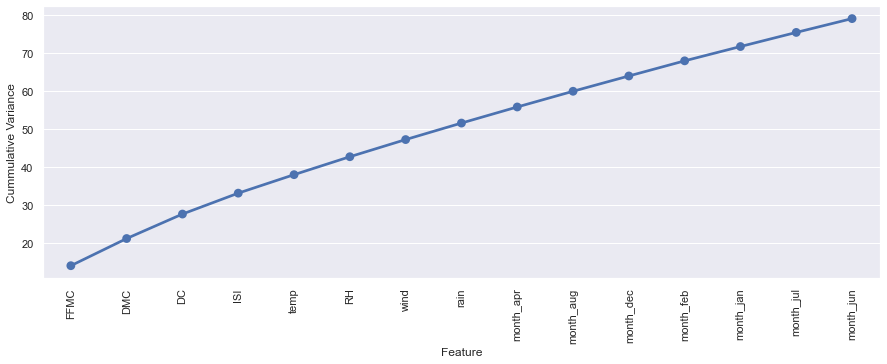

In [34]:
sns.set(font_scale=1)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x="Feature", y="Cummulative Variance", data=pca)
# Shows clearly variation is decreasses, so feature upto temp we consider as important and for our better model prediction we can remove last three feature.

###### As in overall feature Day has variation of only about 2.76% so we can drop that.

# Parametric Tuning Using Grid Search CV:-

### Before performing any PCA:-

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,Y, test_size= 0.3, random_state=22,stratify=Y)

In [42]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = [{"kernel" : ["rbf"], "gamma" : range(1,10,1), "C" : range(1,5,1) }]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': range(1, 5), 'gamma': range(1, 10),
                          'kernel': ['rbf']}])

In [43]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 1, 'kernel': 'rbf'}, 0.7212605042016808)

In [44]:
clf = SVC(C= 1, gamma = 1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)*100
print("Accuracy =",acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 75.33333333333333


array([[  5,  35],
       [  2, 108]], dtype=int64)

### After performing PCA:-

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(pca_values,Y, test_size= 0.3, random_state=22)

In [46]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = [{"kernel" : ["rbf"], "gamma" : range(1,10,1), "C" : range(1,5,1) }]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': range(1, 5), 'gamma': range(1, 10),
                          'kernel': ['rbf']}])

In [47]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 2, 'kernel': 'rbf'}, 0.7413445378151261)

In [48]:
clf = SVC(C= 1, gamma = 6)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)*100
print("Accuracy =",acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 69.33333333333334


array([[  1,  38],
       [  8, 103]], dtype=int64)

### As the Accuracy of our model  get reduced this shows we have removed somme relevant feature

# Performing some other Feature Engg and then prepare new model.

#### Univariate Feature Selection:-

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X,Y)

#summarize scores
score_values = pd.Series(fit.scores_)


In [50]:
score_values.index = X.columns

In [51]:
score_values

FFMC           0.209219
DMC           82.607365
DC           118.282188
ISI            0.012362
temp           0.958734
RH             0.936413
wind           0.392912
rain           6.446073
month_apr      0.092471
month_aug      0.586620
month_dec      9.828901
month_feb      0.110809
month_jan      0.728767
month_jul      0.032879
month_jun      0.517504
month_mar      1.484783
month_may      0.554372
month_nov      0.364384
month_oct      0.000012
month_sep      1.039997
day_fri        0.025234
day_mon        0.869908
day_sat        0.715215
day_sun        0.195286
day_thu        0.778671
day_tue        0.614539
day_wed        0.077392
dtype: float64

In [52]:
score_values.sort_values(ascending=False)

DC           118.282188
DMC           82.607365
month_dec      9.828901
rain           6.446073
month_mar      1.484783
month_sep      1.039997
temp           0.958734
RH             0.936413
day_mon        0.869908
day_thu        0.778671
month_jan      0.728767
day_sat        0.715215
day_tue        0.614539
month_aug      0.586620
month_may      0.554372
month_jun      0.517504
wind           0.392912
month_nov      0.364384
FFMC           0.209219
day_sun        0.195286
month_feb      0.110809
month_apr      0.092471
day_wed        0.077392
month_jul      0.032879
day_fri        0.025234
ISI            0.012362
month_oct      0.000012
dtype: float64

<AxesSubplot:>

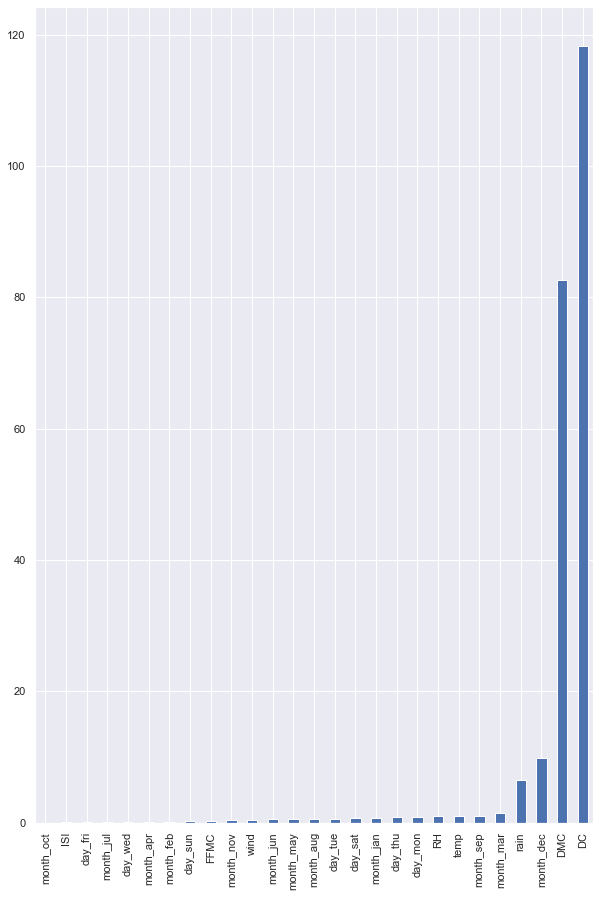

In [53]:
score_values.sort_values().plot.bar(figsize = (10,15))

In [54]:
# Drop some irrelevant feature:-
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
X_fe = X.drop(columns= ['FFMC', 'day_sun', 'month_feb', 'month_apr', 'day_wed', 'month_jul', 'day_fri', 'ISI' ,'month_oct'])
X_fe.shape

(498, 18)

In [56]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
x = SS.fit_transform(X_fe)
x_scaled = pd.DataFrame(x)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,Y, test_size= 0.3, random_state=22)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((348, 18), (150, 18), (348,), (150,))

In [58]:
clf = SVC()
param_grid = [{"kernel" : ["rbf"], "gamma" : range(1,10,1), "C" : range(1,5,1) }]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': range(1, 5), 'gamma': range(1, 10),
                          'kernel': ['rbf']}])

In [59]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 1, 'kernel': 'rbf'}, 0.729747899159664)

In [98]:
clf = SVC(C= 1, gamma = 1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)*100
print("Accuracy =",acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 71.33333333333334


array([[  2,  37],
       [  6, 105]], dtype=int64)